## Descripción del Proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

### Condiciones:

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

### Descripción de los datos

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

Características:

- `geo_data_0.csv`: Descarga el conjunto de datos
- `geo_data_1.csv`: Descarga el conjunto de datos
- `geo_data_2.csv`: Descarga el conjunto de datos
- `id`: identificador único de pozo de petróleo
- `f0, f1, f2`: tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- `product`: volumen de reservas en el pozo de petróleo (miles de barriles).

### Inicialización e importación de librerias 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # Separa los datos en entrenamiento, validación y uno de prueba
from sklearn.linear_model import LinearRegression # Regresión Lineal 
from sklearn.metrics import mean_squared_error, r2_score # Calcular RMSE
from scipy.stats import pearsonr, spearmanr # Correlación por Raking
from sklearn.preprocessing import StandardScaler # clase sklearn dedicada para la estandarización de datos 

# from sklearn.ensemble import RandomForestClassifier # Ajuste de hiperparámetros # Bosque aleatorio
# from sklearn.linear_model import LogisticRegression # Regresión Logistica
# from sklearn.tree import DecisionTreeClassifier # Arbol de desiciones

from sklearn.metrics import roc_auc_score # Calcular el AUC-ROC
from sklearn.metrics import roc_curve # Calcular la curva ROC
from sklearn.metrics import recall_score # Calcular Recall
from sklearn.metrics import precision_score # precision_score
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle # Submuestreo
from sklearn.preprocessing import StandardScaler, MinMaxScaler # estandarizar los datos 

from sklearn.metrics import f1_score # Calcular valor F1

### Cargar datasets

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv') 
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv') 
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv') 

In [3]:
geo_data_0.info()
print()

geo_data_1.info()
print()

geo_data_2.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

In [4]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Conclusión
- El "id" es el identificador único para cada pozo de petroleo, target que queremos predecir el de la columna "product",y los features son las columnas f0, f1 y f2 respectivamente. 

- Para el analisis crearemos nuevas columnas binarias que nos ayudaran para realizar el analisis.

### Preprocesamiento de datos

Corrige el formato en los encabezados de la tabla de acuerdo con las reglas del buen estilo:
* Todos los caracteres deben ser minúsculas.
* Elimina los espacios.
* Si el nombre tiene varias palabras, utiliza snake_case.

### Cantidad de datos 

In [7]:
# Cantidad de datos
geo_data_0.shape # 5 filas 10000 datos

(100000, 5)

In [8]:
# Cantidad de datos
geo_data_1.shape # 5 filas 10000 datos

(100000, 5)

In [9]:
# Cantidad de datos
geo_data_2.shape # 5 filas 10000 datos

(100000, 5)

### Tipo de datos 

In [10]:
# Identificamos tipos de datos
geo_data_0.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [11]:
# Identificamos tipos de datos
geo_data_1.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [12]:
# Identificamos tipos de datos
geo_data_2.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

### Valores ausentes

In [13]:
# Buscamos la suma de los valores ausentes
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
# Buscamos la suma de los valores ausentes
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
# Buscamos la suma de los valores ausentes
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

### Valores duplicados

In [16]:
# Contar duplicados explícitos
geo_data_0.duplicated().sum()

0

In [17]:
# Contar duplicados explícitos
geo_data_1.duplicated().sum()

0

In [18]:
# Contar duplicados explícitos
geo_data_2.duplicated().sum()

0

## Descripción del Proyecto
Entrena y prueba el modelo para cada región en geo_data_0.csv:

Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

Entrena el modelo y haz predicciones para el conjunto de validación.

Guarda las predicciones y las respuestas correctas para el conjunto de validación.

Muestra el volumen medio de reservas predicho y RMSE del modelo.

Analiza los resultados.

Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.

### Entrena y prueba el modelo para cada región en geo_data_0.csv

In [19]:
# Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25
#from sklearn.model_selection import train_test_split # Separa los datos en entrenamiento, validación y uno de prueba

train, valid = train_test_split(geo_data_0, test_size=0.25, random_state=88) 

In [20]:
# Identificamos las caracteristicas
target = 'product'
entity_columns = ['id'] 
features = [f for f in geo_data_0.columns if f not in [target] + entity_columns] 

In [21]:
model_0 = LinearRegression()
model_0.fit(train[features], train[target])

LinearRegression()

In [22]:
# Guarda las predicciones y las respuestas correctas para el conjunto de validación.

preds_0 = model_0.predict(valid[features])
valid.loc[:,"prediction"] = preds_0

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
# Muestra el volumen medio de reservas predicho y RMSE del modelo.
# Mostrar el promedio de la predicción

print(f"""
Mean target (valid): {round(valid[target].mean(), 4)} 
Mean prediction: {round(preds_0.mean(), 4)}
RMSE: {round(mean_squared_error(valid[target], preds_0)**0.5, 4)}
R2: {round(r2_score(valid[target], preds_0), 4)}
Pearson correlation: {round(pearsonr(valid[target], preds_0).statistic, 4)} 
Spearman correlation: {round(spearmanr(valid[target], preds_0).statistic, 4)}
""")


Mean target (valid): 92.3657 
Mean prediction: 92.616
RMSE: 37.3769
R2: 0.2811
Pearson correlation: 0.5302 
Spearman correlation: 0.5244



In [24]:
# Verificamos la columna preds en valid
valid.head()

,id,f0,f1,f2,product,prediction
87676,Holbl,1.618767,-0.201431,5.252203,123.801417,121.234306
31492,vqga7,0.809676,0.685569,1.212376,30.132880,79.036922
35517,8xtqg,1.587763,-0.258385,4.148627,157.733201,114.655055
37967,IWPNS,1.600379,-0.323751,1.385491,140.020959,97.422219
72103,oxfza,0.310908,0.908978,2.991960,104.368564,85.743222


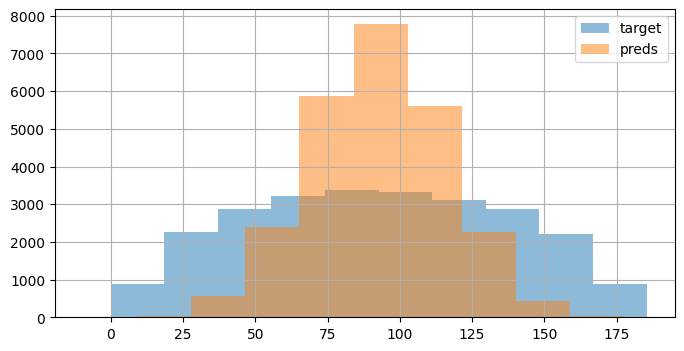

In [25]:
# De las predicciones construimos un histograma para demostrar que esta equilibrado.

plt.figure(figsize=(8, 4))
valid[target].hist(ax=plt.gca(), label="target", alpha=0.5)
valid["prediction"].hist(ax=plt.gca(), label="preds", alpha=0.5)
plt.legend()
plt.show()

- Analiza los resultados.

  Utilizamos un grafico para expresar mejor que el modelo este bien calibrado, a que en promedio va a estar haciendo predicciones dentro del mismo rango y al menos las dos distribuciones estan centradas.
  
  Tenemos la mayor cantidad de observaciones en lo que llaman "las colas" y podemos quizas predecir que es ahi donde el modelo mas se equivoca, cuando las reservas son pocas, o las unidades son pocas o son muy grandes el modelo tiende a equivocarse.
  
  RMSE: 37.3769 este resultado significa que en promedio nos estamos equivocando como en 37.37 unidades, lo que nos hace desconfiar del modelo, pero vamos a predecir las 200 unidades mas altas para este caso.  
  
  Pearson correlation: 0.5302 Toma tal cual los valores
  
  Spearman correlation: 0.5244 En lugar de tomar tal cual los valores les asigna un ranking no con los valores originales

### Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.


In [26]:
# Combinar df
geo_data = pd.merge(geo_data_1, geo_data_2, on='id')

# Agrupar el DataFrame combinado por una columna específica:
geo_data_result = geo_data.groupby('id').sum()         # Puedes usar sum(), mean(), etc.

In [27]:
geo_data_result.head()

,f0_x,f1_x,f2_x,product_x,f0_y,f1_y,f2_y,product_y
id,,,,,,,,
D8TNs,-0.646266,3.667055,1.006161,30.132364,0.280382,0.061393,4.887870,114.943876
TAqwC,-13.045712,-13.056006,0.007640,3.179103,-0.176382,-0.503558,1.877303,38.618695
g2I86,17.818406,2.946716,0.991640,26.953261,-1.616730,1.110380,4.226968,107.940639
uMqiK,2.734183,-3.102346,-0.002654,0.000000,-1.772509,0.152085,-0.422541,119.682928


In [28]:
# Función de ambos df

def geo_data_result(
    df, 
    geo_data,
    target='product', 
    entity_columns=['id'],
    print_geo=False
):
    features = [f for f in df.columns if f not in [target] + entity_columns]
    train, valid = train_test_split(df.copy(), test_size=0.25, random_state=88)
    
    model = LinearRegression()
    model.fit(train[features], train[target])
    
    preds_result = model.predict(valid[features])
    valid.loc[:, "prediction"] = preds_result
    
    if print_geo:    
        print(f"""
        Mean target (valid): {round(valid[target].mean(), 4)} 
        Mean prediction: {round(preds_result.mean(), 4)}
        RMSE: {round(mean_squared_error(valid[target], preds_result)**0.5, 4)}
        R2: {round(r2_score(valid[target], preds_result), 4)}
        Pearson correlation: {round(pearsonr(valid[target], preds_result)[0], 4)} 
        Spearman correlation: {round(spearmanr(valid[target], preds_result).correlation, 4)}
        """)
    return valid

In [29]:
# Identificamos las caracteristicas región en geo_data_1.csv
target = 'product'
entity_columns = ['id'] 
features = [f for f in geo_data_1.columns if f not in [target] + entity_columns] 

train, valid = train_test_split(geo_data_1, test_size=0.25, random_state=88) 

In [30]:
# Entrena y prueba el modelo para cada región en geo_data_1.csv

for df in [valid]:
    geo_data_result(df, geo_data_1, print_geo=True)


        Mean target (valid): 68.3398 
        Mean prediction: 68.3143
        RMSE: 0.902
        R2: 0.9996
        Pearson correlation: 0.9998 
        Spearman correlation: 0.9956
        


In [31]:
# Identificamos las caracteristicas región en geo_data_2.csv
target = 'product'
entity_columns = ['id'] 
features = [f for f in geo_data_2.columns if f not in [target] + entity_columns] 

train, valid = train_test_split(geo_data_2, test_size=0.25, random_state=88) 

In [32]:
# Entrena y prueba el modelo para cada región en geo_data_2.csv

for df in [valid]:
    geo_data_result(df, geo_data_2, print_geo=True)


        Mean target (valid): 94.6305 
        Mean prediction: 94.749
        RMSE: 40.3149
        R2: 0.1926
        Pearson correlation: 0.439 
        Spearman correlation: 0.4412
        


Conclusiones:
- 

Hasta ahora la región con mejores predicciones es la región en geo_data_1.csv

Estos resultados son métricas comunes para evaluar el rendimiento de un modelo de regresión:

- Mean target (valid): Es el promedio del valor real de tu variable objetivo en el conjunto de validación.
- Mean prediction: Es el promedio de las predicciones hechas por tu modelo.
- RMSE (Root Mean Squared Error): Es la raíz cuadrada del error cuadrático medio. Mide la diferencia entre los valores predichos por el modelo y los valores reales. Un RMSE más bajo indica un mejor ajuste del modelo a los datos.
- R2 (R-squared): Es el coeficiente de determinación. Mide la proporción de la variabilidad de la variable dependiente que es predecible a partir de las variables independientes. Un valor de R2 más cercano a 1 indica que el modelo explica una gran proporción de la variabilidad.
- Pearson correlation: Mide la correlación lineal entre las predicciones y los valores reales. Un valor cercano a 1 indica una fuerte correlación positiva.
- Spearman correlation: Mide la correlación de rango entre las predicciones y los valores reales. También un valor cercano a 1 indica una fuerte correlación positiva.
- En este caso, los valores altos de R2 y las correlaciones indican que el modelo está realizando muy bien las predicciones, con una alta precisión en comparación con los valores reales.

In [33]:
valid.head()

,id,f0,f1,f2,product
87676,hSNQ1,3.757045,-0.763501,8.485584,168.989257
31492,WZRKo,-1.211181,1.288807,6.889363,89.151554
35517,aAKsw,-1.010040,-1.474991,6.117334,141.126068
37967,2Z156,1.943389,0.908113,0.296594,156.962126
72103,0PM2H,0.403979,0.942331,1.766959,106.932658


## Prepárate para el cálculo de ganancias:

- Almacena todos los valores necesarios para los cálculos en variables separadas.

- Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

- Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

In [34]:
# Almacena todos los valores necesarios para los cálculos en variables separadas.

income_per_unit = 4500 # El ingreso de una unidad de producto es de 4500 dólares
risk_threshold = 0.025 # Regiones con riesgo de pérdidas inferior al 2.5%
cost_200_wells = 100000000  # Dada la inversión de 100 millones por 200 es 100.000.000/200 = 500.000
cost_per_well = cost_200_wells / 200 # El presupuesto para el desarrollo de 200 pozos petroleros

In [35]:
# Esto es equivalente a 111.1 unidades
cost_per_well / income_per_unit

111.11111111111111

In [36]:
print(valid.columns)

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')


## Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

- Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

- Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.

- Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

In [37]:
# Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

def compute_gains(
    df,
    region_name,
    prediction_col="prediction",
    product_col="product",
    income_per_unit=income_per_unit,
    cost_200_wells=cost_200_wells,
    print_result=False
):
    
    df_ordered = df.sort_values(by=prediction_col, ascending=False).reset_index() #Ordenar el DataFrame según la columna de predicción”.
    top_200_wells = df_ordered.head(200) # Elegimos los 200 pozos 
    
    real_revenues = top_200_wells[product_col].sum()*income_per_unit # volumen objetivo
    estimated_revenues = top_200_wells[prediction_col].sum()*income_per_unit # Calculamos las ganancias
    
    if print_result:
        print(f"""
        {region_name}
        Mean predicted target: {round(top_200_wells[prediction_col].mean(), 4)} 
        Mean target: {round(top_200_wells[product_col].mean(), 4)}

        Estimated revenues: {round(estimated_revenues, 4)} 
        Estimated profit: {round(estimated_revenues - cost_200_wells, 4)}
        
        Real revenues: {round(real_revenues, 4)}
        Real profit: {round(real_revenues - cost_200_wells, 4)}
        -----------------------------------------------------------------
        """)
    
    return real_revenues, estimated_revenues

In [38]:
# Región 0

train, valid_0 = train_test_split(geo_data_0, test_size=0.25, random_state=88) 

model_0 = LinearRegression()
model_0.fit(train[features], train[target])

preds_0 = model_0.predict(valid_0[features])
valid_0["prediction"] = preds_0

/tmp/ipykernel_49/72283520.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_0["prediction"] = preds_0


In [39]:
# Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.
# Calcula la ganancia potencial de los 200 pozos principales por región. 
# Modelo para cada región en geo_data_0.csv

for df in [valid_0]:
    compute_gains(df, region_name="region_0", print_result=True)


        region_0
        Mean predicted target: 154.5402 
        Mean target: 147.9285

        Estimated revenues: 139086182.0648 
        Estimated profit: 39086182.0648
        
        Real revenues: 133135684.391
        Real profit: 33135684.391
        -----------------------------------------------------------------
        


In [40]:
# Región 1

train, valid_1 = train_test_split(geo_data_1, test_size=0.25, random_state=88) 

model_1 = LinearRegression()
model_1.fit(train[features], train[target])

preds_1 = model_1.predict(valid_1[features])
valid_1["prediction"] = preds_1


/tmp/ipykernel_49/1569518096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1["prediction"] = preds_1


In [41]:
for df in [valid_1]:
    compute_gains(df, region_name="region_1", print_result=True)


        region_1
        Mean predicted target: 138.6664 
        Mean target: 137.9454

        Estimated revenues: 124799754.3869 
        Estimated profit: 24799754.3869
        
        Real revenues: 124150866.9668
        Real profit: 24150866.9668
        -----------------------------------------------------------------
        


In [51]:
# Región 2

train, valid_2 = train_test_split(geo_data_2, test_size=0.25, random_state=88) 

model_2 = LinearRegression()
model_2.fit(train[features], train[target])

preds_2 = model_2.predict(valid_2[features])
valid_2["prediction"] = preds_2


/tmp/ipykernel_49/302304540.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2["prediction"] = preds_2


In [52]:
for df in [valid_2]:
    compute_gains(df, region_name="region_2", print_result=True)


        region_2
        Mean predicted target: 148.7107 
        Mean target: 139.2355

        Estimated revenues: 133839590.3859 
        Estimated profit: 33839590.3859
        
        Real revenues: 125311974.9758
        Real profit: 25311974.9758
        -----------------------------------------------------------------
        


Conclusiones:
- Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

### Región 0:
        Mean predicted target: 154.5402 
        Mean target: 147.9285

        Estimated revenues: 139086182.0648 
        Estimated profit: 39086182.0648
        
        Real revenues: 133135684.391
        Real profit: 33135684.391
-------------------------------------
### Región 1:
        Mean predicted target: 138.6664 
        Mean target: 137.9454

        Estimated revenues: 124799754.3869 
        Estimated profit: 24799754.3869
        
        Real revenues: 124150866.9668
        Real profit: 24150866.9668
-------------------------------------
### Región 2:
        Mean predicted target: 148.7107 
        Mean target: 139.2355

        Estimated revenues: 133839590.3859 
        Estimated profit: 33839590.3859
        
        Real revenues: 125311974.9758
        Real profit: 25311974.9758
            

## Análisis:

- En términos de ingresos estimados, de mayor a menor. 
- Región 0 = 139,086,182.0648
- Región 2 = 133,839,590.3859 
- Región 1 = 124,799,754.3869 

- La Región 0 muestra un alto ingreso estimado, pero su beneficio real es negativo debido a los costos involucrados.
- Cuando consideramos el beneficio real, la Región 0 tiene el mayor beneficio, seguida por la Región 0 y luego la Región 1.

## Calcula riesgos y ganancias para cada región:

Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?

In [53]:
# técnica bootstrapping.

In [54]:
# funsión zip toma 2 valores string asociados con un valir númerico 

for name, value in zip(["name1", "name2"], [100, 200]):
    print(name, value)

name1 100
name2 200


In [55]:
%%time
bootstrap_reps = 1000   # Muestra de 1000
bootstrap_size = 500    # Instrucciones: Al explorar la región, se lleva a cabo un estudio de 
                        # 500 puntos con la selección de los mejores 200 puntos para el
                        # cálculo del beneficio.
results = {}

for region_name, df in zip(["region_0", "region_1", "region_2"], [valid_0, valid_1, valid_2]):
    region_gains = []
    
    for i in np.arange(1, bootstrap_reps):
        
        bootstrap_sample = df.sample(n=bootstrap_size, replace=True) # Muestra bootstrap con replace en True
        real_revenues, esitmated_revenues = compute_gains(bootstrap_sample, region_name="region_0")
        
        region_gains.append(real_revenues - cost_200_wells)
    
    results[region_name] = {
        "gains": region_gains,
        "is_loss": [g < 0 for g in region_gains]
    }

CPU times: user 5.18 s, sys: 6.36 ms, total: 5.18 s
Wall time: 5.2 s


In [56]:
for region in ['region_0']:
    
    print(f"""
    Region: {region}
    Risk level: {round(sum(results.get(region).get('is_loss')) / len(results.get(region).get('is_loss')), 4)}
    """)


    Region: region_0
    Risk level: 0.0631
    


In [57]:
for region in ['region_1']:
    
    print(f"""
    Region: {region}
    Risk level: {round(sum(results.get(region).get('is_loss')) / len(results.get(region).get('is_loss')), 4)}
    """)


    Region: region_1
    Risk level: 0.009
    


In [58]:
for region in ['region_2']:
    
    print(f"""
    Region: {region}
    Risk level: {round(sum(results.get(region).get('is_loss')) / len(results.get(region).get('is_loss')), 4)}
    """)


    Region: region_2
    Risk level: 0.0921
    


### Conclusiones 
-  La Región 1 es la mejor opción debido a su bajo nivel de riesgo.  

- A diferencia del beneficio real, la Región 0 tiene el mayor beneficio, en la conclusión anterior.         

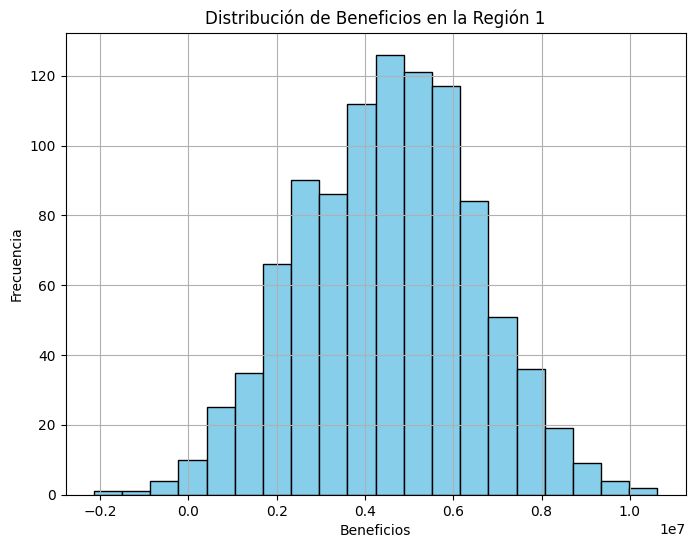

In [59]:
# Obtén los beneficios de la Región 1
region_0_gains = results.get("region_1").get("gains")

# Crea un histograma
plt.figure(figsize=(8, 6))
plt.hist(region_0_gains, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Beneficios')
plt.ylabel('Frecuencia')
plt.title('Distribución de Beneficios en la Región 1')
plt.grid(True)

# Muestra el gráfico
plt.show()
